In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/DSO 585 - My notebooks')

# Confirm that the files are accessible
os.listdir()

['computed_insight_success_of_active_sellers.csv',
 'unique-categories.csv',
 'unique-categories.sorted-by-count.csv',
 'summer-products-with-rating-and-performance_2020-08.csv',
 'Books_5.json.gz',
 'dso 585 ecommerce-Cleaning & EDA + Rating Analysis.ipynb']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
computed_insights = pd.read_csv('computed_insight_success_of_active_sellers.csv')
computed_insights.head()

,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate
0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0
1,5708773c3c02161b3f8c7900,5,107100,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0
2,5417aada4ad3ab27e954b76c,2,100007,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN
3,570f3a713a698c14278bb51e,1,100000,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0
4,53082ea15aefb07dfe1f2a4f,1,100000,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN


In [ ]:
unique_categories = pd.read_csv('unique-categories.csv')
unique_categories.head()

,tag
0,#fashion #shorts
1,#fashion #tshirt
2,#Sport Bra
3,#Summer Clothes
4,#top #crop


In [ ]:
categories_count = pd.read_csv('unique-categories.sorted-by-count.csv')
categories_count.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [ ]:
products = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# Focusing on Products Tables

## Columns

In [ ]:
len(products.columns)

43

## Inital Rows

In [ ]:
len(products)

1573

## Nulls

In [ ]:
#checking nulls
products.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
currency_buyer,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,45


##  Duplicates

In [ ]:
#checking duplicates

print(f'There are {len(products)} rows.')
duplicates = products[products.duplicated()]
print(f'There are {len(duplicates)} duplicates.')
products_cleaned =products.drop_duplicates()
print(f'After removing duplicates, there are {len(products_cleaned)} rows.')

There are 1573 rows.
There are 34 duplicates.
After removing duplicates, there are 1539 rows.


## Product id as unique identifier for each row

In [ ]:
#is product_id a primary unique identifier for each row
len(products_cleaned.product_id) - len(products_cleaned.product_id.unique())
#no, investigate
product_id_counts = products_cleaned.groupby('product_id')['product_id'].value_counts().sort_values(ascending = False).reset_index()
product_id_counts
#at most, a product id has two rows

,product_id,count
0,5e93d2215a3eed0c80ed2e56,2
1,5eb4dd169263020a42be1a88,2
2,5dd372bed0d2f061a0c6fdea,2
3,5d0729b0f945bd59ac54b329,2
4,5abb1309dc0c285e4eb675a8,2
...,...,...
1336,5cb99a6535110466bac87472,1
1337,5cb99a5eb6259b187cc77184,1
1338,5cb934f3a866551356e5f254,1
1339,5cb854e30715c33b71bcd318,1


### Examining the product ids with two

In [ ]:
pd.set_option('display.max_columns', None)
# Ensure 'product_id_counts' has the 'count' column correctly named
product_id_two = product_id_counts.loc[product_id_counts['count'] == 2, 'product_id']
product_id_two

,product_id
0,5e93d2215a3eed0c80ed2e56
1,5eb4dd169263020a42be1a88
2,5dd372bed0d2f061a0c6fdea
3,5d0729b0f945bd59ac54b329
4,5abb1309dc0c285e4eb675a8
...,...
193,594dcfd3346d4b7048be7495
194,5ec39565bb9e684ea7371e7c
195,5ecc8472fe429946b009900e
196,591c6e86681f5f27332330ce


In [ ]:
duplicate_product_id = products_cleaned[products_cleaned.product_id.isin(product_id_two)].sort_values(by = 'product_id')
#they seem like almost duplicates...
#what is different, which row to include/exclude
duplicate_product_id.head(10)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
954,Mode Femmes Blanc D'été Boho Sexy Dentelle Cre...,Fashion Womens White Summer Boho Sexy Lace Hol...,11.0,10,EUR,10000,0,3.75,1717,745.0,349.0,274.0,145.0,204.0,0,0,0,0,"Mini,bikiniswimwearcoverup,Fashion,Lace,Summer...",white,NaN,50,Livraison standard,3,0,23,50,NaN,NaN,CN,Home Goods,公狼电子,"90 % avis positifs (190,918 notes)",190918,4.235887,54125ab34ad3ab158c0f72d9,0,NaN,https://www.wish.com/c/5577faf03cef83230c39d0c3,https://contestimg.wish.com/api/webimage/5577f...,5577faf03cef83230c39d0c3,summer,2020-08
1179,Mode Femmes Blanc D'été Boho Sexy Dentelle Cre...,Fashion Womens White Summer Boho Sexy Lace Hol...,11.0,10,EUR,10000,0,3.75,1717,745.0,349.0,274.0,145.0,204.0,0,0,0,0,"Mini,bikiniswimwearcoverup,Fashion,Lace,Summer...",white,NaN,50,Livraison standard,3,0,23,50,1.0,Quantité limitée !,CN,Home Goods,公狼电子,"90 % avis positifs (190,918 notes)",190918,4.235887,54125ab34ad3ab158c0f72d9,0,NaN,https://www.wish.com/c/5577faf03cef83230c39d0c3,https://contestimg.wish.com/api/webimage/5577f...,5577faf03cef83230c39d0c3,summer,2020-08
962,Maillots de bain à rayures pour dames avec dou...,Women's stripes Lined up double up tankini top...,8.0,7,EUR,20000,0,4.05,8904,4640.0,1964.0,1121.0,493.0,686.0,0,0,0,0,"strapless,Bikinis Set,tankini bathing suits,To...",black,S,50,Livraison standard,2,0,31,50,NaN,NaN,CN,Facing the sea,facingthesea,"89 % avis positifs (19,221 notes)",19221,4.168097,5760bd976238335e38551943,0,NaN,https://www.wish.com/c/57639e8824841762459c5e5c,https://contestimg.wish.com/api/webimage/57639...,57639e8824841762459c5e5c,summer,2020-08
137,Maillots de bain à rayures pour dames avec dou...,Women's stripes Lined up double up tankini top...,8.0,7,EUR,20000,0,4.05,8904,4640.0,1964.0,1121.0,493.0,686.0,0,0,0,0,"strapless,Bikinis Set,tankini bathing suits,To...",black,S,50,Livraison standard,2,0,31,50,1.0,Quantité limitée !,CN,Facing the sea,facingthesea,"89 % avis positifs (19,221 notes)",19221,4.168097,5760bd976238335e38551943,0,NaN,https://www.wish.com/c/57639e8824841762459c5e5c,https://contestimg.wish.com/api/webimage/57639...,57639e8824841762459c5e5c,summer,2020-08
968,S-5XL Summer Women Casual Tops Off Shoulder Fa...,S-5XL Summer Women Casual Tops Off Shoulder Fa...,9.0,65,EUR,1000,0,4.09,520,281.0,113.0,56.0,30.0,40.0,0,0,0,0,"Summer,Bat,Fashion,Tops & Blouses,Shirt,Sleeve...",black,L,13,Livraison standard,3,0,94,50,1.0,Quantité limitée !,CN,roserose,roserose,"86 % avis positifs (38,985 notes)",38985,4.064230,58c35950e2de036da9e2b570,0,NaN,https://www.wish.com/c/58db2a4eca5fec55a2b176a8,https://contestimg.wish.com/api/webimage/58db2...,58db2a4eca5fec55a2b176a8,summer,2020-08
851,S-5XL Summer Women Casual Tops Off Shoulder Fa...,S-5XL Summer Women Casual Tops Off Shoulder Fa...,9.0,65,EUR,1000,0,4.09,520,281.0,113.0,56.0,30.0,40.0,0,0,0,0,"Summer,Bat,Fashion,Tops & Blouses,Shirt,Sleeve...",black,L,13,Livraison standard,3,0,94,50,NaN,NaN,CN,roserose,roserose,"86 % avis positifs (38,985 notes)",38985,4.064230,58c35950e2de036da9e2b570,0,NaN,https://www.wish.com/c/58db2a4eca5fec55a2b176a8,https://contestimg.wish.com/api/webimage/58db2...,58db2a4eca5fec55a2b176a8,summer,2020-08
1360,Femmes Chemisiers à coutures en dentelle Chemi...,Women Lace Stitching Blouses Sexy Hollow Out O...,11.0,10,EUR,10000,0,3.65,2422,1056.0,419.0,375.0,190.0,382.0,0

### Removing the almost Duplicates

- It seems like these are duplicates only differing in has_agency and urgency_texts

In [ ]:
#what if i drop has_agency_banner and urgency_texts. how many columns will be there now?
# It seems has_agen
products_cleaned_2 = products_cleaned.drop(columns=['has_urgency_banner', 'urgency_text'])
print(f'Rows before dropping duplicates: {len(products_cleaned_2)}')

#drop duplicates
products_cleaned_2 = products_cleaned_2.drop_duplicates()

print(f'Rows before after duplicates: {len(products_cleaned_2)}')

# the difference is 198 which represents the duplicate product id

Rows before dropping duplicates: 1539
Rows before after duplicates: 1341


In [ ]:
# goal: to have a cleaned df, that has only distinct product id.
# drop a row if id is in product_id_two and has_urgency_banner is null and urgency_text is null
products_cleaned = products_cleaned[~(products_cleaned['product_id'].isin(product_id_two) &
                              products_cleaned['has_urgency_banner'].isna() &
                              products_cleaned['urgency_text'].isna())]

#check if product_id is unique to each row, by doing row counts
product_id_counts = products_cleaned.groupby('product_id')['product_id'].value_counts().sort_values(ascending = False).reset_index()
product_id_counts.head()

,product_id,count
0,535530635aefb0555ba4351f,1
1,5e5f56ea3dbe9d00474f503f,1
2,5e5f507c931bd44190563aa1,1
3,5e5e09065b03ef0b420f333f,1
4,5e5cb06e8ac7c478f8cc2cb5,1


- **Comment:** Now we have 1341 rows where product_id is a unique identifier

In [ ]:
products = products_cleaned

# Exploring Columns of Interest

In [ ]:
columns_of_interest = ['price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
      'product_color', 'has_urgency_banner', 'urgency_text', 'merchant_rating_count', 'merchant_rating',
       'merchant_id','product_id']

for column in columns_of_interest:
    print(column)

price
retail_price
units_sold
uses_ad_boosts
rating
rating_count
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_color
has_urgency_banner
urgency_text
merchant_rating_count
merchant_rating
merchant_id
product_id


## units_sold

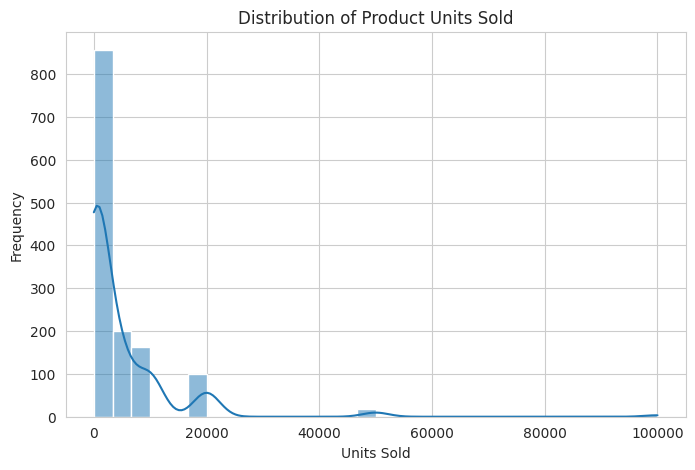

In [ ]:
#Distribution of units sold
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(products["units_sold"], bins=30, kde=True)

# Labels and title
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Distribution of Product Units Sold")

# Show plot
plt.show()


#right skewed, we may have to do transformations.

In [ ]:
products.units_sold.describe()

,units_sold
count,1341.000000
mean,4820.662938
std,9947.731683
min,1.000000
25%,100.000000
50%,1000.000000
75%,5000.000000
max,100000.000000


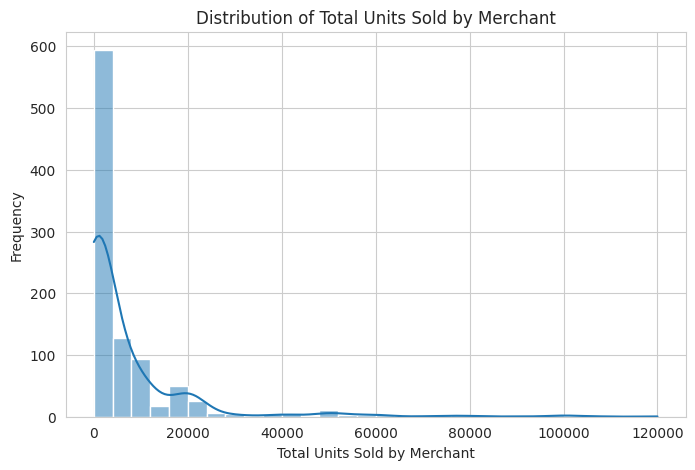

In [ ]:
merchant_sales = products.groupby('merchant_id')['units_sold'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(merchant_sales["units_sold"], bins=30, kde=True)

# Labels and title
plt.xlabel("Total Units Sold by Merchant")
plt.ylabel("Frequency")
plt.title("Distribution of Total Units Sold by Merchant")

# Show plot
plt.show()

In [ ]:
merchant_sales.units_sold.describe()

,units_sold
count,958.000000
mean,6747.921712
std,13936.822154
min,1.000000
25%,100.000000
50%,1000.000000
75%,6800.000000
max,120000.000000


## price & retail_price

- What is the difference?

price: price you would pay to get the product

retail_price: reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or the price before discount.

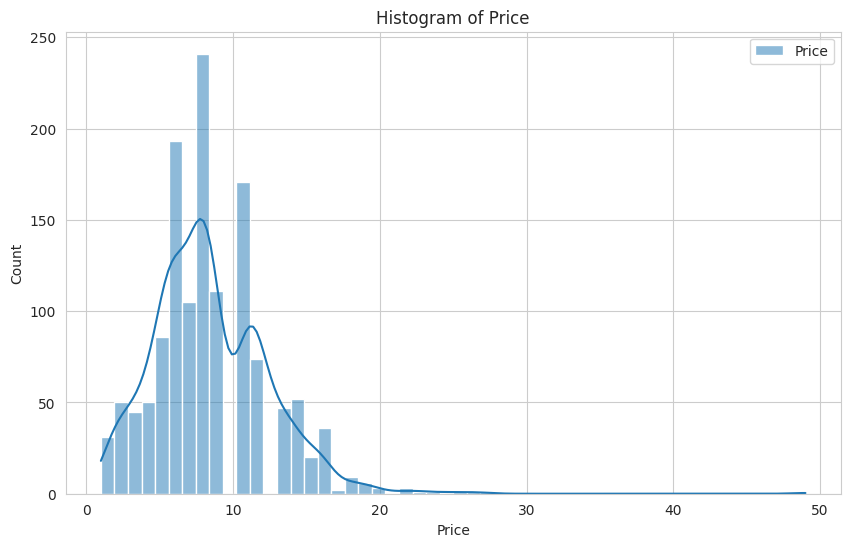

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(products['price'], label='Price', kde=True, alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Price')
plt.legend()
plt.show()

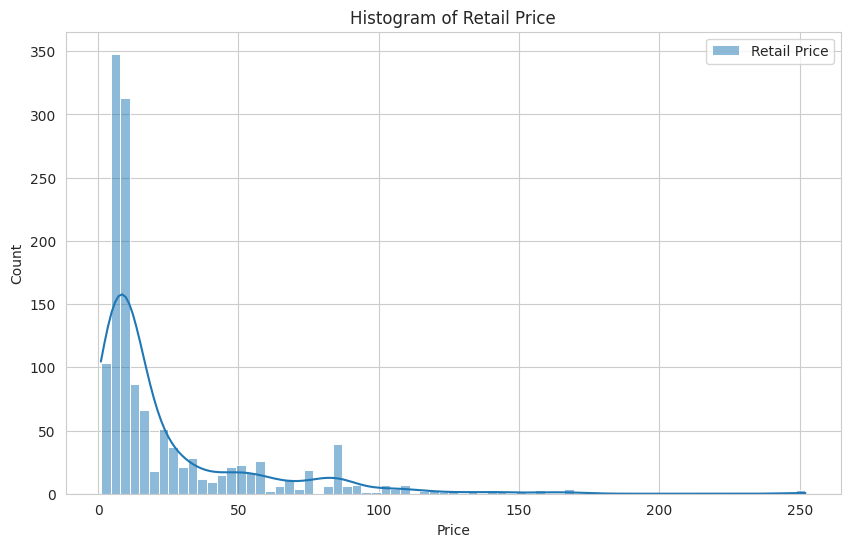

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(products['retail_price'], label='Retail Price', kde=True, alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Retail Price')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=['Price', 'Retail Price'])

# Add boxplot for Price
fig.add_trace(go.Box(y=products['price'], name='Price'), row=1, col=1)

# Add boxplot for Retail Price
fig.add_trace(go.Box(y=products['retail_price'], name='Retail Price'), row=1, col=2)

# Set y-axis range for both plots
fig.update_yaxes(range=[0, 260], row=1, col=1)
fig.update_yaxes(range=[0, 260], row=1, col=2)

# Update layout
fig.update_layout(title_text="Side-by-Side Boxplots of Price and Retail Price", height=800, width = 500)

# Show plot
fig.show()




In [ ]:
import plotly.express as px
products['price_difference'] = products['retail_price'] - products['price']

# Create the boxplot
fig = px.box(products, y='price_difference', title='Boxplot of Price Difference')

fig.update_layout(height=800, width = 500)

# Show the plot
fig.show()

In [ ]:
products['price_difference'].describe()

,price_difference
count,1341.000000
mean,15.361320
std,29.491545
min,-7.000000
25%,-1.000000
50%,0.260000
75%,19.000000
max,244.000000


In [ ]:
# Create the scatter plot with regression line
fig = px.scatter(products, x='price_difference', y='units_sold',
                 title='Scatter Plot of Units Sold vs Price Difference',
                 trendline='ols')

fig.update_layout(height=800)
# Show the plot
fig.show()

## uses_ad_boosts

<ipython-input-29-91daa058ba18>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




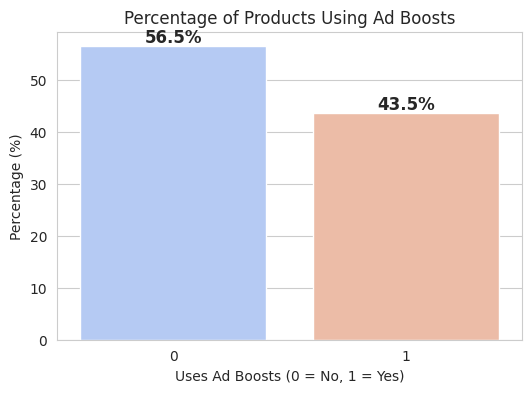

In [ ]:
# Count occurrences of each category
ad_boost_counts = products["uses_ad_boosts"].value_counts(normalize=True) * 100  # Convert to percentage

# Create bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=ad_boost_counts.index, y=ad_boost_counts.values, palette="coolwarm")

# Annotate with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

# Labels and title
plt.xlabel("Uses Ad Boosts (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Products Using Ad Boosts")

# Show plot
plt.show()

In [ ]:
ad_boost_units = products.groupby('uses_ad_boosts')['units_sold'].mean()
ad_boost_units

,units_sold
uses_ad_boosts,
0,5027.158520
1,4552.996575


In [ ]:
fig = px.box(products, x='uses_ad_boosts', y='units_sold',
             title='Boxplot of Units Sold by Uses of Ad Boosts', points = False)

fig.update_layout(height=800)
# Show the plot
fig.show()

## rating & related

In [ ]:
rating_metrics = ['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', ]

In [ ]:
products[rating_metrics].isnull().sum()

,0
rating,0
rating_count,0
rating_five_count,35
rating_four_count,35
rating_three_count,35
rating_two_count,35
rating_one_count,35


In [ ]:
missing = products[products[rating_metrics].isnull().any(axis =1)]

### No Rating
- it seems where no rating is given for a product, the products automatically gets a 5
- how would this affect our analysis?
- should we exclude those without ratings?

In [ ]:
missing[missing.rating_count == 0].rating.describe()

,rating
count,35.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


### Removing Rows with No Rating

In [ ]:
#remove the empty ratings?
products_cleaned = products[~products['product_id'].isin(missing['product_id'])]
len(products_cleaned)

1306

In [ ]:
products = products_cleaned

In [ ]:
import plotly.express as px

# Create a histogram for the 'rating' column
fig = px.histogram(products, x='rating', nbins=10, title="Distribution of Ratings")

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count'
)

# Show the plot
fig.show()


In [ ]:
products.rating.describe()

,rating
count,1306.000000
mean,3.809043
std,0.452242
min,1.000000
25%,3.570000
50%,3.850000
75%,4.097500
max,5.000000


In [ ]:
# Create a histogram for the 'rating' column
fig = px.histogram(products, x='rating_count', nbins=500, title="Distribution of Ratings Count")

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count'
)

# Show the plot
fig.show()

In [ ]:
products.rating_count.describe()


,rating_count
count,1306.000000
mean,1008.171516
std,2115.278062
min,1.000000
25%,36.000000
50%,220.500000
75%,997.500000
max,20744.000000


In [ ]:
fig = px.box(products, y='rating_count',
             title='Boxplot of Rating Count', points = False)

fig.update_layout(height=800)
# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Create a scatter plot for 'rating' vs 'rating_count'
fig = px.scatter(products, y='rating', x='rating_count',
                 title="Rating vs Rating Count",
                 labels={"rating": "Rating", "rating_count": "Number of Ratings"}, trendline = 'ols')

# Show the plot
fig.show()

- Question: how to adjust the ratings to account for the number of rating?
- Is it necessary?
- Bayesian mean

### Transforming Rating to Account for Number of Ratings

In [ ]:
overall_average_rating = products ['rating'].mean()
overall_average_rating

3.8090428790199087

In [ ]:
# Calculate the overall average rating (M)
#overall_average_rating = rating_metrics_only['rating'].mean()

# Define a function to adjust the ratings
def adjust_rating(row, overall_avg, min_ratings=100):
    product_rating = row['rating']
    rating_count = row['rating_count']

    if rating_count >= min_ratings:
        return product_rating  # Use the product's actual rating if there are enough ratings
    else:
        # Use a weighted average between the product's rating and the overall average
        return (product_rating * rating_count + overall_avg * min_ratings) / (rating_count + min_ratings)

# Apply the adjustment function
products['adjusted_rating'] = products.apply(
    lambda row: adjust_rating(row, overall_average_rating), axis=1
)

# View the adjusted ratings
products[['rating', 'rating_count', 'adjusted_rating']]

,rating,rating_count,adjusted_rating
0,3.76,54,3.791846
1,3.45,6135,3.450000
2,3.57,14,3.779687
4,3.10,20,3.690869
5,5.00,1,3.820835
...,...,...,...
1567,4.25,3127,4.250000
1568,4.08,1367,4.080000
1569,3.07,28,3.647377
1570,3.71,59,3.772291


## badges

In [ ]:
products.badges_count.value_counts()

,count
badges_count,
0,1169
1,125
2,10
3,2


In [ ]:
#sales by badge count
products.groupby('badges_count')['units_sold'].mean()

,units_sold
badges_count,
0,4777.005133
1,6764.000000
2,2270.000000
3,5500.000000


In [ ]:
products.groupby('badge_local_product')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
badge_local_product,,,,,,,,
0,1278.0,4970.828638,10123.654415,2.0,100.0,1000.0,5000.0,100000.0
1,28.0,3957.142857,5681.772583,100.0,100.0,1000.0,5000.0,20000.0


In [ ]:
products.groupby('badge_product_quality')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
badge_product_quality,,,,,,,,
0,1202.0,4771.729617,10055.673669,2.0,100.0,1000.0,5000.0,100000.0
1,104.0,6999.038462,9784.865421,100.0,1000.0,5000.0,10000.0,50000.0


In [ ]:
products.groupby('badge_fast_shipping')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
badge_fast_shipping,,,,,,,,
0,1287.0,4955.958819,10021.408299,2.0,100.0,1000.0,5000.0,100000.0
1,19.0,4484.210526,12069.394865,100.0,100.0,100.0,1000.0,50000.0


# Exploring our business questions

## Distribution of Units Sold

In [ ]:
import plotly.express as px

# Compute the mean rating
mean_units = products['units_sold'].mean()
median_units = products['units_sold'].median()
# Create histogram
fig = px.histogram(products, x='units_sold',title="Distribution of Units Sold", width = 600)

# Update the layout for better readability and white background
fig.update_layout(
    xaxis_title='Units Sold',
    yaxis_title='Count',
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)

fig.add_vline(x=mean_units, line_dash="dash", line_color="red",
              annotation_text=f"Mean: {mean_units:.2f}", annotation_position="top")


# Show the plot
fig.show()

In [ ]:
fig = px.box(products, y='units_sold',
             title='Boxplot of Units Sold', points = False, width = 600)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Unit Sold',
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
import numpy as np

# Apply log transformation
products['log_units_sold'] = np.log(products['units_sold'])  # log(1 + x) to handle zeros safely


# Create histogram of log-transformed units sold
fig = px.histogram(products, x='log_units_sold', title="Distribution of Log-Transformed Units Sold", width = 600)

# Update the layout for better readability and white background
fig.update_layout(
    xaxis_title='Log(Units Sold)',
    yaxis_title='Count',
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)

fig.show()

## Average Rating on Sales

In [ ]:
import plotly.express as px

# Compute the mean and median rating
mean_rating = products['rating'].mean()
median_rating = products['rating'].median()

# Create histogram
fig = px.histogram(products, x='rating', nbins=10, title="Distribution of Ratings", height = 500, width = 600)

# Update the layout for better readability and white background
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)

# Add vertical line at the mean rating
fig.add_vline(x=mean_rating, line_dash="dash", line_color="red")

# Add vertical line at the median rating
fig.add_vline(x=median_rating, line_dash="dot", line_color="blue")

# Add annotation for mean rating (positioned at top right)
fig.add_annotation(
    x=mean_rating, y=max(products['rating'].value_counts()),  # Position at peak
    text=f"Mean: {mean_rating:.2f}",
    showarrow=False,
    arrowhead=2,
    xshift = -50,
    yshift=300,  # Move above the histogram
    font=dict(color="red")
)

# Add annotation for median rating (positioned lower to avoid overlap)
fig.add_annotation(
    x=median_rating, y=max(products['rating'].value_counts()),  # Slightly lower than mean annotation
    text=f"Median: {median_rating:.2f}",
    showarrow=False,
    arrowhead=2,
    xshift = 50,
    yshift=300,  # Move below the mean annotation
    font=dict(color="blue")
)

# Show the plot
fig.show()

In [ ]:
products['rating'].describe()

,rating
count,1306.000000
mean,3.809043
std,0.452242
min,1.000000
25%,3.570000
50%,3.850000
75%,4.097500
max,5.000000


In [ ]:
fig = px.scatter(products, y='units_sold', x='rating',
                 title="Units Sold vs Rating",
                 labels={"rating": "Rating", "units_sold": "Units Sold"}, trendline = 'ols', height = 500, width = 600)


fig.update_layout(
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)


# Show the plot
fig.show()

## Merchant Rating

In [ ]:
import plotly.express as px

# Compute the mean and median rating
mean_rating = products['merchant_rating'].mean()
median_rating = products['merchant_rating'].median()

# Create histogram
fig = px.histogram(products, x='merchant_rating', nbins=10, title="Distribution of Ratings", height = 500, width = 600)

# Update the layout for better readability and white background
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)

# Add vertical line at the mean rating
fig.add_vline(x=mean_rating, line_dash="dash", line_color="red")

# Add vertical line at the median rating
fig.add_vline(x=median_rating, line_dash="dot", line_color="blue")

# Add annotation for mean rating (positioned at top right)
fig.add_annotation(
    x=mean_rating, y=max(products['merchant_rating'].value_counts()),  # Position at peak
    text=f"Mean: {mean_rating:.2f}",
    showarrow=False,
    arrowhead=2,
    xshift = -50,
    yshift=310,  # Move above the histogram
    font=dict(color="red")
)

# Add annotation for median rating (positioned lower to avoid overlap)
fig.add_annotation(
    x=median_rating, y=max(products['merchant_rating'].value_counts()),  # Slightly lower than mean annotation
    text=f"Median: {median_rating:.2f}",
    showarrow=False,
    arrowhead=2,
    xshift = 50,
    yshift=310,  # Move below the mean annotation
    font=dict(color="blue")
)

# Show the plot
fig.show()

In [ ]:
fig = px.scatter(products, y='units_sold', x='merchant_rating',
                 title="Units Sold vs Merchant Rating",
                 labels={"merchant_rating": "Rating", "units_sold": "Units Sold"}, trendline = 'ols')

# Show the plot
fig.show()

In [ ]:
fig = px.scatter(products, y='units_sold', x='merchant_rating',
                 title="Units Sold vs Rating",
                 labels={'merchant_rating': "Rating", "units_sold": "Units Sold"}, trendline = 'ols', height = 500, width = 600)


fig.update_layout(
    plot_bgcolor='white',  # Set plot area background color to white
    font=dict(color='black')  # Ensure text is visible on a white background
)


# Show the plot
fig.show()

In [ ]:
# what about after adjusting?

## Urgency Messaging & Units Sold

In [ ]:
products['has_urgency_banner'] = products['has_urgency_banner'].fillna(0)


In [ ]:
import plotly.express as px
import pandas as pd

# Compute the mean and count for each category
category_stats = products.groupby('has_urgency_banner')['units_sold'].agg(['mean', 'count']).reset_index()

# Create the boxplot
fig = px.box(products, x='has_urgency_banner', y='units_sold',
             title='Units Sold by Urgency Banner Status ', points=False, width=600, height = 500)

# Update layout for better readability
fig.update_layout(
    xaxis_title='',
    yaxis_title='Units Sold',
    plot_bgcolor='white',
    font=dict(color='black')
)

# Add annotations for mean and count
for i, row in category_stats.iterrows():
    # Get the mean and count values for the category
    mean_value = row['mean']
    count_value = row['count']
    # Add annotation for the mean
    fig.add_annotation(
        x=row['has_urgency_banner'],
        y=110000,
        text=f'Mean Units Sold: {mean_value:.2f}',
        showarrow=False,
        arrowhead=2,
        arrowsize=1,
        arrowcolor='blue',
        font=dict(color='blue'),
        ax=0, ay=-40  # Adjust position to avoid overlap
    )
    # Add annotation for the count
    fig.add_annotation(
        x=row['has_urgency_banner'],
        y=120000,  # Place annotation near the top
        text=f'Count: {count_value}',
        showarrow=False,
        font=dict(color='black'),
        align='center'
    )

# Show the plot
fig.show()


In [ ]:
fig = px.box(products, x = 'has_urgency_banner',y='units_sold',
             title='Boxplot of Units Sold', points = False, width = 600)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Unit Sold',
    plot_bgcolor='white',
    font=dict(color='black')
)

# Show the plot
fig.show()

In [ ]:
products.groupby('has_urgency_banner')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
has_urgency_banner,,,,,,,,
0.0,851.0,5385.486486,10491.368329,2.0,100.0,1000.0,5000.0,100000.0
1.0,455.0,4132.901099,9119.107134,10.0,100.0,1000.0,5000.0,100000.0


In [ ]:
#use boxplot

## AdBoost

In [ ]:
products.groupby('uses_ad_boosts')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,736.0,5170.161685,10233.427517,2.0,100.0,1000.0,5000.0,100000.0
1,570.0,4663.649123,9806.887362,10.0,100.0,1000.0,5000.0,100000.0


In [ ]:
import plotly.express as px
import pandas as pd

# Compute the mean and count for each category
category_stats = products.groupby('uses_ad_boosts')['units_sold'].agg(['mean', 'count']).reset_index()

# Create the boxplot
fig = px.box(products, x='uses_ad_boosts', y='units_sold',
             title='Units Sold by Ad Boost Usage', points=False, width=600, height = 500)

# Update layout for better readability
fig.update_layout(
    xaxis_title='',
    yaxis_title='Units Sold',
    plot_bgcolor='white',
    font=dict(color='black')
)

# Add annotations for mean and count
for i, row in category_stats.iterrows():
    # Get the mean and count values for the category
    mean_value = row['mean']
    count_value = row['count']
    # Add annotation for the mean
    fig.add_annotation(
        x=row['uses_ad_boosts'],
        y=110000,
        text=f'Mean Units Sold: {mean_value:.2f}',
        showarrow=False,
        arrowhead=2,
        arrowsize=1,
        arrowcolor='blue',
        font=dict(color='blue'),
        ax=0, ay=-40  # Adjust position to avoid overlap
    )
    # Add annotation for the count
    fig.add_annotation(
        x=row['uses_ad_boosts'],
        y=120000,  # Place annotation near the top
        text=f'Count: {count_value}',
        showarrow=False,
        font=dict(color='black'),
        align='center'
    )

# Show the plot
fig.show()


## Price Sensitivity

In [ ]:
fig = px.scatter(products, y='units_sold', x='price',
                 title="Units Sold vs Price",
                 labels={"price": "Price", "units_sold": "Units Sold"}, trendline = 'ols')

# Show the plot
fig.show()

In [ ]:
fig = px.scatter(products, y='units_sold', x='price_difference',
                 title="Units Sold vs Price Difference",
                 labels={"price_difference": "Price Difference", "units_sold": "Units Sold"}, trendline = 'ols')

# Show the plot
fig.show()

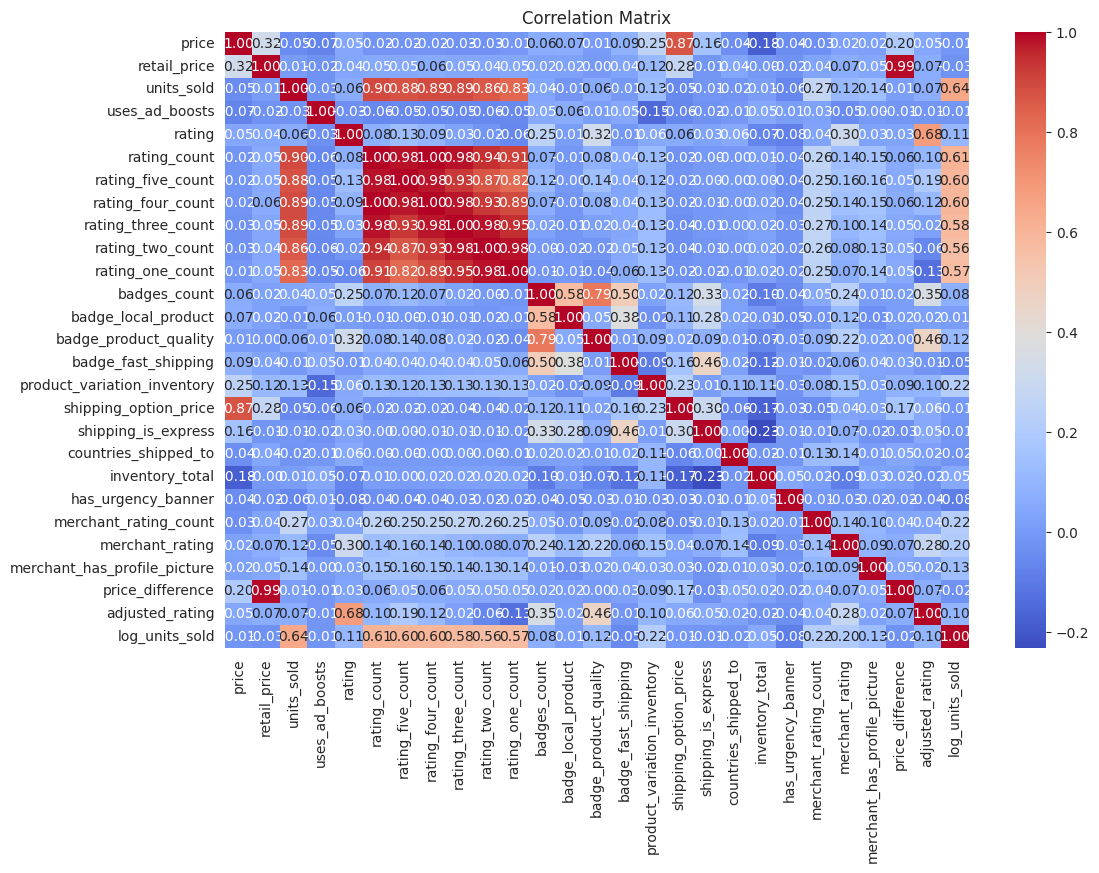

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = products.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

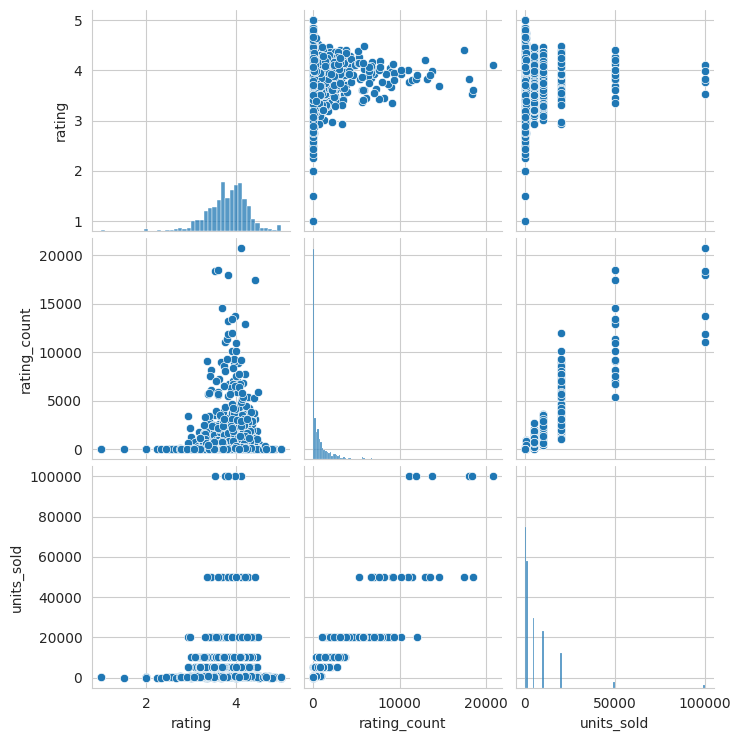

In [ ]:
sns.pairplot(products[['rating', 'rating_count', 'units_sold']])
plt.show()

## Rating Count - Rating - Units Sold Relationship

- As the number of units sold increase, the rating goes towards around 4...
- As rating count increases, the rating goes towards around 4
- What will we do, adjust the rating with the number of ratings-- to capture possibly 'the true rate': in comes bayesian whatever

In [ ]:
fig = px.scatter(products, y='units_sold', x='adjusted_rating',
                 title="Units Sold vs Rating",
                 labels={'adjusted_rating': "Rating", "units_sold": "Units Sold"}, trendline = 'ols')

#Show the plot
fig.show()

In [ ]:
cols_of_interest = ['price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'origin_country', 'merchant_title', 'merchant_name', 'merchant_rating_count', 'merchant_rating', 'has_urgency_banner', 'adjusted_rating']

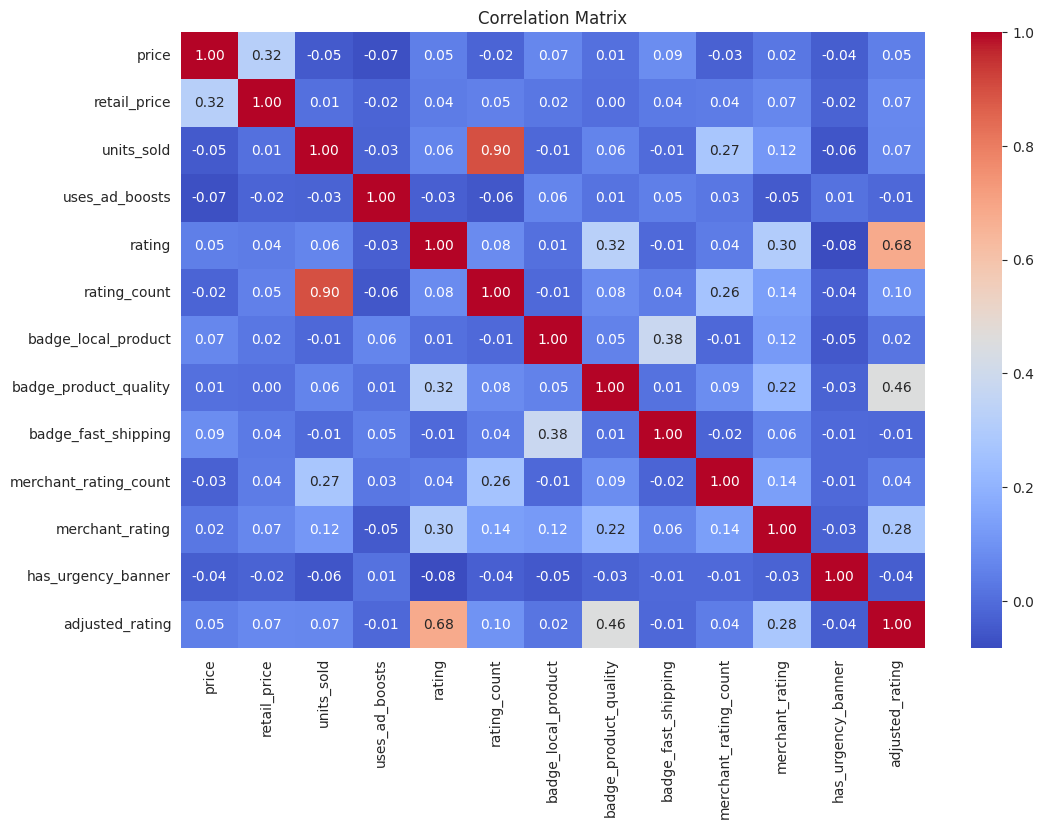

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = products[cols_of_interest].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

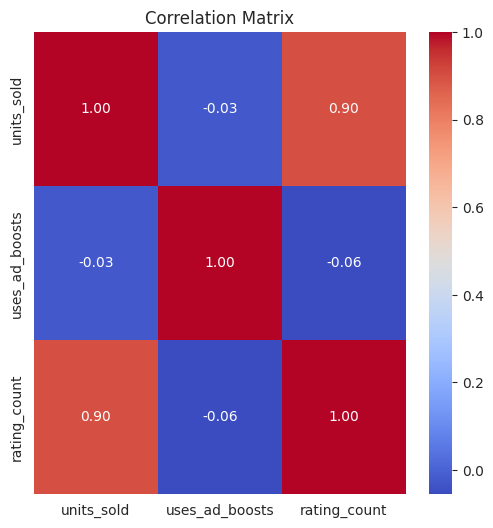

In [ ]:
plt.figure(figsize=(6, 6))
corr_matrix = products[['units_sold','uses_ad_boosts', 'rating_count']].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

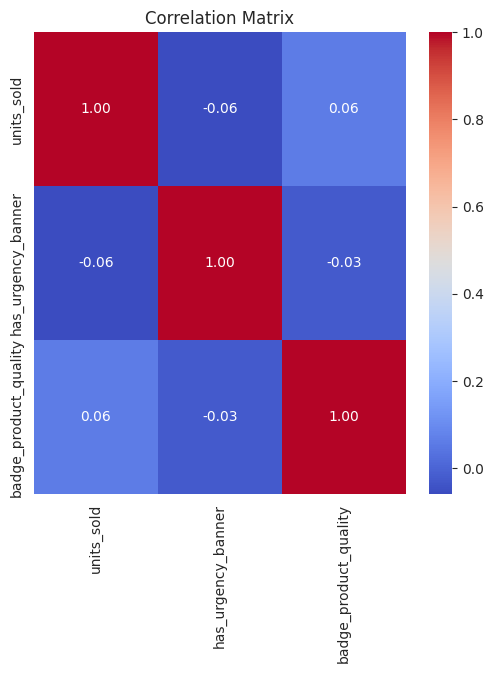

In [ ]:
plt.figure(figsize=(6, 6))
corr_matrix = products[['units_sold','has_urgency_banner','badge_product_quality']].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

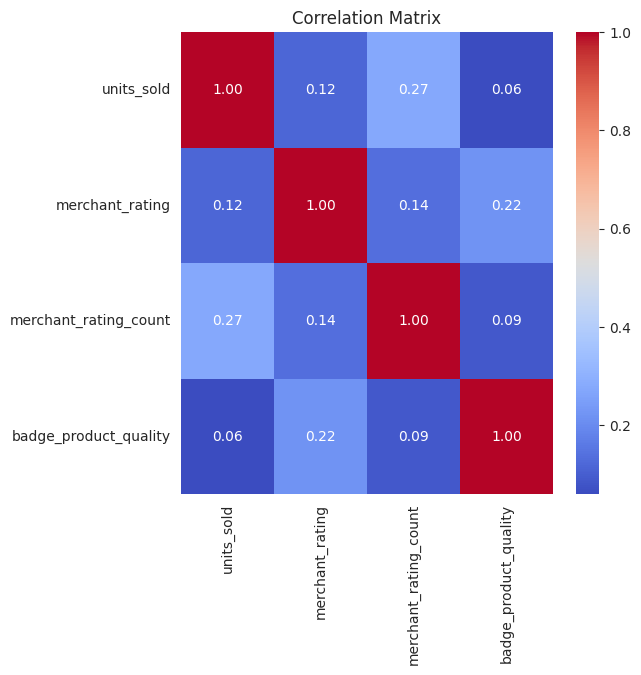

In [ ]:
plt.figure(figsize=(6, 6))
corr_matrix = products[['units_sold','merchant_rating','merchant_rating_count','badge_product_quality']].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
fig = px.histogram(products, x='adjusted_rating', nbins=10, title="Distribution of Ratings")

# Update the layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count'
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Melt the dataframe to have both ratings in a single column
products_melted = products.melt(value_vars=['adjusted_rating', 'rating'], var_name='Rating Type', value_name='Rating')

# Create histogram with overlay
fig = px.histogram(products_melted, x='Rating', color='Rating Type', nbins=10,
                   title="Distribution of Ratings (Adjusted vs. Original)",
                   barmode='overlay',  # Overlay histograms instead of stacking
                   opacity=0.5)  # Adjust transparency for better visibility

# Add borders to histogram bars, matching the border color to the bar color
fig.update_traces(marker_line_width=1.5, marker_line_color='black')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    legend_title='Rating Type'
)

# Show the plot
fig.show()


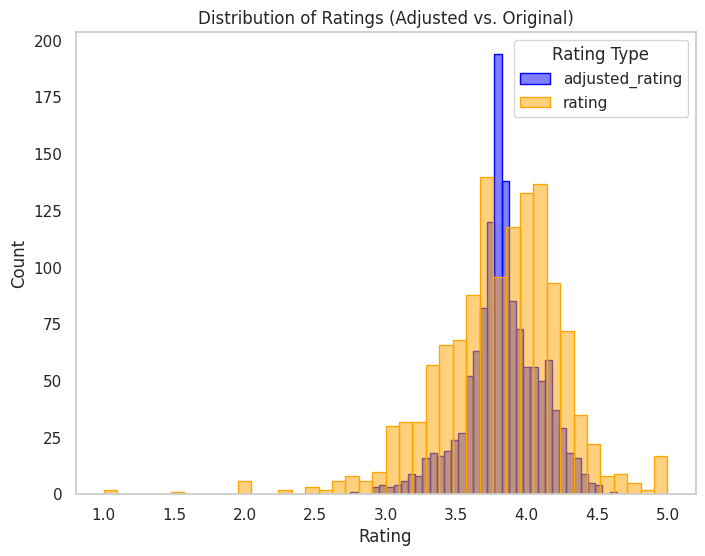

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define colors for each rating type
colors = {'adjusted_rating': 'blue', 'rating': 'orange'}

# Create the histogram plot
plt.figure(figsize=(8, 6))

# Plot histograms with borders matching the bar color
for rating_type, color in colors.items():
    sns.histplot(products[rating_type], kde=False, color=color, edgecolor=color, label=rating_type, alpha=0.5)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings (Adjusted vs. Original)')
plt.legend(title="Rating Type")
plt.grid(False)

# Show the plot
plt.show()


In [ ]:
import plotly.express as px

# Melt the dataframe to have both ratings in a single column
products_melted = products.melt(value_vars=['adjusted_rating', 'rating'], var_name='Rating Type', value_name='Rating')

# Create histogram with overlay
fig = px.histogram(products_melted, x='Rating', color='Rating Type', nbins=10,
                   title="Distribution of Ratings (Adjusted vs. Original)",
                   barmode='overlay',  # Overlay histograms instead of stacking
                   opacity=0.5, width = 600)  # Adjust transparency for better visibility

# Update layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    legend_title='Rating Type',
    plot_bgcolor = 'white'
)

# Show the plot
fig.show()

In [ ]:

smf.ols("units_sold ~ rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.068
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0245
Time:                        07:37:44   Log-Likelihood:                -13885.
No. Observations:                1306   AIC:                         2.777e+04
Df Residuals:                    1304   BIC:                         2.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -317.1896   2355.680     -0.135      0.893   -4938.527    4304.148
rating      1382.5744    614.134      2.251      0.025     177.776    2587.373
==============================================================================
Omnibus:                     1405.238   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91966.232
Skew:                           5.290   Prob(JB):                         0.00
Kurtosis:                      42.725   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("units_sold ~ adjusted_rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.119
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0135
Time:                        07:37:44   Log-Likelihood:                -13885.
No. Observations:                1306   AIC:                         2.777e+04
Df Residuals:                    1304   BIC:                         2.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5047.2831   4050.545     -1.246      0.213    -1.3e+04    2899.015
adjusted_rating  2609.7544   1054.991      2.474      0.013     540.089    4679.419
==============================================================================
Omnibus:                     1406.638   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92355.596
Skew:                           5.298   Prob(JB):                         0.00
Kurtosis:                      42.811   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("log_units_sold ~ rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_units_sold   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.67
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000134
Time:                        07:37:44   Log-Likelihood:                -2801.7
No. Observations:                1306   AIC:                             5607.
Df Residuals:                    1304   BIC:                             5618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0176      0.486     10.329      0.000       4.065       5.971
rating         0.4850      0.127      3.830      0.000       0.237       0.733
==============================================================================
Omnibus:                      348.934   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.770
Skew:                          -0.071   Prob(JB):                     1.05e-13
Kurtosis:                       1.962   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("log_units_sold ~ adjusted_rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_units_sold   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000516
Time:                        07:37:44   Log-Likelihood:                -2802.9
No. Observations:                1306   AIC:                             5610.
Df Residuals:                    1304   BIC:                             5620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9603      0.836      4.735      0.000       2.319       5.601
adjusted_rating     0.7583      0.218      3.481      0.001       0.331       1.186
==============================================================================
Omnibus:                      436.197   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.675
Skew:                          -0.044   Prob(JB):                     1.49e-14
Kurtosis:                       1.922   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(products,
                 x='rating',
                 y='units_sold',
                 color='has_urgency_banner',
                 title="Scatter Plot of Units Sold vs. Rating",
                 labels={'rating': 'Rating', 'units_sold': 'Units Sold', 'badge_product_quality': 'Product Quality Badge'},
                 opacity=0.7)

# Update layout for readability
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title="Rating",
    yaxis_title="Units Sold"
)

# Show the plot
fig.show()

In [ ]:
products.loc[(products.rating > 4.5) & (products.rating < 4.9), ['rating_count','rating', 'adjusted_rating']].sort_values(by = 'rating', ascending = True)

,rating_count,rating,adjusted_rating
853,552,4.52,4.520000
1073,106,4.52,4.520000
798,312,4.52,4.520000
675,43,4.53,4.025834
96,13,4.54,3.893135
1343,76,4.55,4.129002
636,23,4.57,3.951336
218,7,4.57,3.858825
1016,33,4.58,4.000333
1483,10,4.60,3.880948


In [ ]:
smf.ols("units_sold ~ rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.068
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0245
Time:                        07:37:45   Log-Likelihood:                -13885.
No. Observations:                1306   AIC:                         2.777e+04
Df Residuals:                    1304   BIC:                         2.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -317.1896   2355.680     -0.135      0.893   -4938.527    4304.148
rating      1382.5744    614.134      2.251      0.025     177.776    2587.373
==============================================================================
Omnibus:                     1405.238   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91966.232
Skew:                           5.290   Prob(JB):                         0.00
Kurtosis:                      42.725   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("units_sold ~ merchant_rating", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     17.68
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.80e-05
Time:                        07:37:45   Log-Likelihood:                -13879.
No. Observations:                1306   AIC:                         2.776e+04
Df Residuals:                    1304   BIC:                         2.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.917e+04   5742.838     -3.338      0.001   -3.04e+04   -7900.946
merchant_rating  5967.6298   1419.434      4.204      0.000    3183.005    8752.255
==============================================================================
Omnibus:                     1413.803   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95510.522
Skew:                           5.333   Prob(JB):                         0.00
Kurtosis:                      43.514   Cond. No.                         89.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("units_sold ~ C(has_urgency_banner)", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.619
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0318
Time:                        07:37:45   Log-Likelihood:                -13885.
No. Observations:                1306   AIC:                         2.777e+04
Df Residuals:                    1304   BIC:                         2.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5385.4865    343.993     15.656      0.000    4710.647    6060.326
C(has_urgency_banner)[T.1.0] -1252.5854    582.794     -2.149      0.032   -2395.902    -109.269
==============================================================================
Omnibus:                     1404.564   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91832.541
Skew:                           5.286   Prob(JB):                         0.00
Kurtosis:                      42.696   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.ols("units_sold ~ C(uses_ad_boosts)", data=products).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8160
Date:                Thu, 27 Feb 2025   Prob (F-statistic):              0.367
Time:                        07:37:45   Log-Likelihood:                -13887.
No. Observations:                1306   AIC:                         2.778e+04
Df Residuals:                    1304   BIC:                         2.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5170.1617    370.431     13.957      0.000    4443.456    5896.867
C(uses_ad_boosts)[T.1]  -506.5126    560.714     -0.903      0.367   -1606.512     593.487
==============================================================================
Omnibus:                     1403.655   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91304.667
Skew:                           5.283   Prob(JB):                         0.00
Kurtosis:                      42.576   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Cleaned Data

In [ ]:
products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,price_difference,adjusted_rating,log_units_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,-2.00,3.791846,4.605170
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,14.00,3.450000,9.903488
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,35.00,3.779687,4.605170
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,0.28,3.690869,4.605170
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,0.0,NaN,CN,zhoulinglinga,zhoulinglinga,75 % avis positifs (65 notes),65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08,5.08,3.820835,2.302585


# Causal Exploration

## Starting with baseline OLS regression

In [ ]:
model_1= smf.ols('log_units_sold ~ adjusted_rating',data = products).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_units_sold   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000516
Time:                        07:37:45   Log-Likelihood:                -2802.9
No. Observations:                1306   AIC:                             5610.
Df Residuals:                    1304   BIC:                             5620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9603      0.836      4.735      0.000       2.319       5.601
adjusted_rating     0.7583      0.218      3.481      0.001       0.331       1.186
==============================================================================
Omnibus:                      436.197   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.675
Skew:                          -0.044   Prob(JB):                     1.49e-14
Kurtosis:                       1.922   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
model_confounders = smf.ols('log_units_sold ~ adjusted_rating + np.log(rating_count) + C(badge_product_quality)',data = products).fit()
model_confounders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_units_sold   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2615.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        07:37:45   Log-Likelihood:                -1535.8
No. Observations:                1306   AIC:                             3080.
Df Residuals:                    1302   BIC:                             3100.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7945      0.355      7.880      0.000       2.099       3.490
C(badge_product_quality)[T.1]    -0.0581      0.091     -0.640      0.522      -0.236       0.120
adjusted_rating                  -0.1591      0.093     -1.707      0.088      -0.342       0.024
np.log(rating_count)              0.8963      0.010     87.747      0.000       0.876       0.916
==============================================================================
Omnibus:                        5.876   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                7.240
Skew:                           0.030   Prob(JB):                       0.0268
Kurtosis:                       3.360   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2= smf.ols('log_units_sold ~ adjusted_rating + np.log(rating_count)',data = products).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_units_sold   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     3925.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        07:37:45   Log-Likelihood:                -1536.1
No. Observations:                1306   AIC:                             3078.
Df Residuals:                    1303   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8957      0.317      9.123      0.000       2.273       3.518
adjusted_rating         -0.1859      0.083     -2.231      0.026      -0.349      -0.022
np.log(rating_count)     0.8957      0.010     88.121      0.000       0.876       0.916
==============================================================================
Omnibus:                        5.953   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                7.347
Skew:                           0.032   Prob(JB):                       0.0254
Kurtosis:                       3.362   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

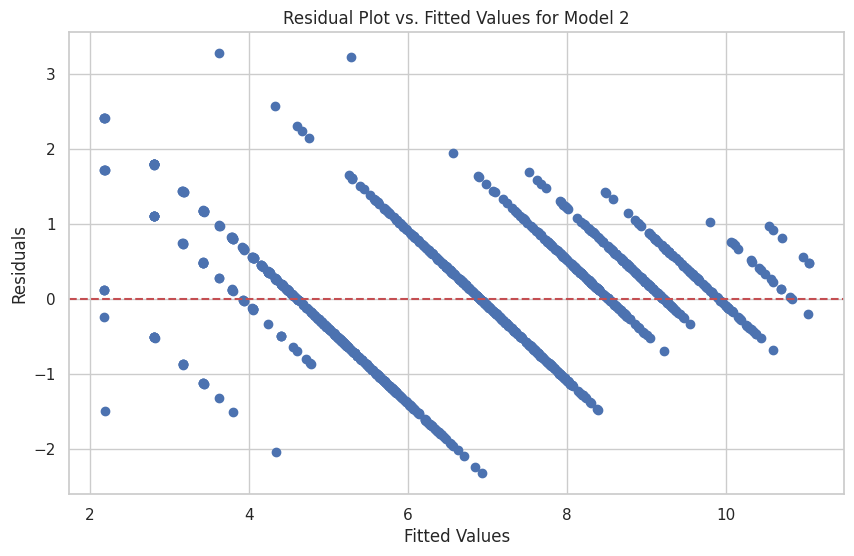

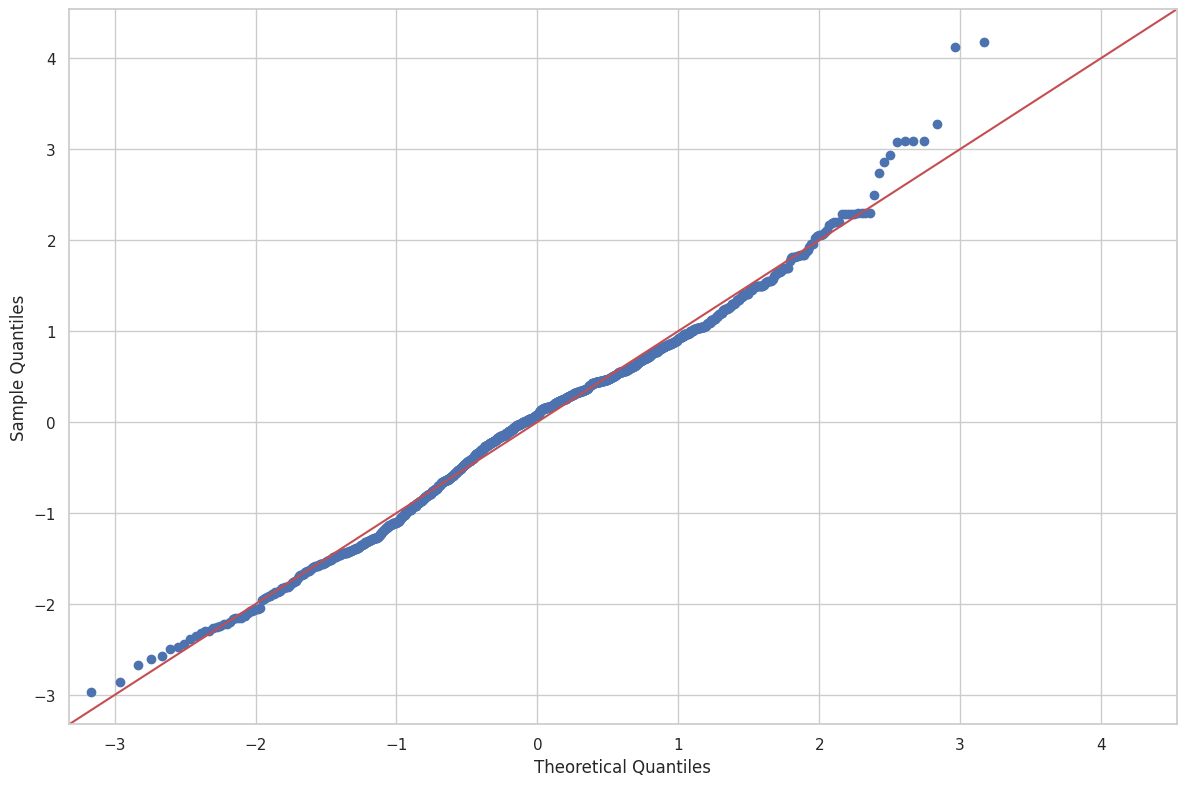

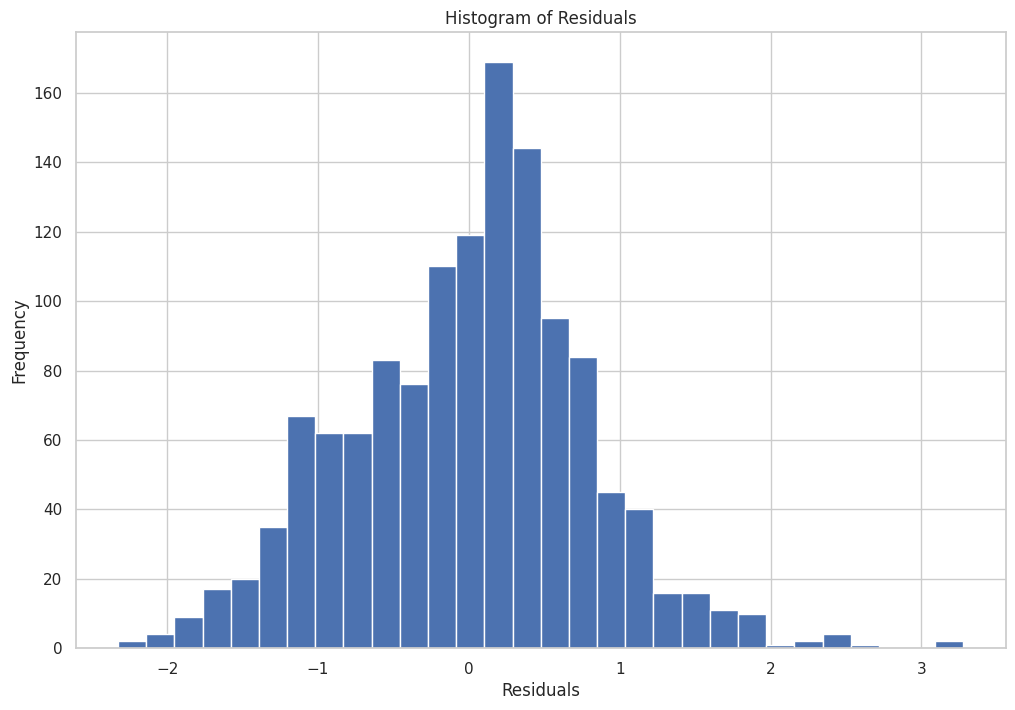

In [ ]:
# prompt: run regression diagnostic plots for model_2:  residual plot vs fitted values, normal q-q, and histogram of residuals

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming model_2 is already defined as in your code
# model_2 = smf.ols('log_units_sold ~ adjusted_rating + np.log(rating_count)', data=products).fit()

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(model_2.fittedvalues, model_2.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot vs. Fitted Values for Model 2")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Normal Q-Q plot
fig = plt.figure(figsize=(12,8))
fig = sm.qqplot(model_2.resid, line='45', fit=True, ax = fig.gca())
fig.tight_layout(pad=1.0)
plt.show()


# Histogram of residuals
plt.figure(figsize=(12,8))
plt.hist(model_2.resid, bins=30)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

## Exploring Double Machine Learning

In [ ]:
# prompt: provide code to implement double machine learning, with product as the outcome variable, adjusted_rating as the treatment and confounders being rating_count and badge_product_qualtity

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

def double_machine_learning(df, outcome, treatment, confounders):
    # Prepare the data
    y = df[outcome]
    t = df[treatment]
    x = df[confounders]

    # Split data into training and testing sets
    x_train, x_test, t_train, t_test, y_train, y_test = train_test_split(x, t, y, test_size=0.2, random_state=42)

    # First Stage:  Regression Models
    # Model for the treatment (T)
    model_t = LassoCV(cv=5).fit(x_train, t_train)  # Example: Lasso regression, can use others
    t_hat_train = model_t.predict(x_train)
    t_hat_test = model_t.predict(x_test)

    # Model for the outcome (Y)
    model_y = LassoCV(cv=5).fit(x_train, y_train)
    y_hat_train = model_y.predict(x_train)
    y_hat_test = model_y.predict(x_test)

    # Second Stage:  Estimate the treatment effect
    # Residuals
    y_res_train = y_train - y_hat_train
    y_res_test = y_test - y_hat_test
    t_res_train = t_train - t_hat_train
    t_res_test = t_test - t_hat_test

    # Estimate treatment effect using residuals
    # Using Ordinary Least Squares on Residuals
    # Can use a different method
    model_final = sm.OLS(y_res_train, sm.add_constant(t_res_train)).fit()

    # Get the estimated treatment effect coefficient
    ate = model_final.params[1] # Average treatment effect
    print(f'ATE from Double Machine Learning: {ate}')

    return ate

# Example usage (replace with your data and column names):
# Assuming 'products' dataframe is available from the previous code block
double_machine_learning(products, "log_units_sold", "adjusted_rating", ["rating_count", "badge_product_quality"])


ATE from Double Machine Learning: 0.28879554546920205


<ipython-input-97-2a7ac006f940>:40: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.28879554546920205

In [ ]:
# prompt: using the double_machine_learning function: with product as the outcome variable, adjusted_rating as the treatment and confounders being np.log (rating_count), first add a column of np.rating_count

import numpy as np

# Assuming 'products' dataframe is available from the previous code block
products['log_rating_count'] = np.log(products['rating_count'])

def double_machine_learning(df, outcome, treatment, confounders):
    # Prepare the data
    y = df[outcome]
    t = df[treatment]
    x = df[confounders]

    # Split data into training and testing sets
    x_train, x_test, t_train, t_test, y_train, y_test = train_test_split(x, t, y, test_size=0.2, random_state=42)

    # First Stage:  Regression Models
    # Model for the treatment (T)
    model_t = LassoCV(cv=5).fit(x_train, t_train)  # Example: Lasso regression, can use others
    t_hat_train = model_t.predict(x_train)
    t_hat_test = model_t.predict(x_test)

    # Model for the outcome (Y)
    model_y = LassoCV(cv=5).fit(x_train, y_train)
    y_hat_train = model_y.predict(x_train)
    y_hat_test = model_y.predict(x_test)

    # Second Stage:  Estimate the treatment effect
    # Residuals
    y_res_train = y_train - y_hat_train
    y_res_test = y_test - y_hat_test
    t_res_train = t_train - t_hat_train
    t_res_test = t_test - t_hat_test

    # Estimate treatment effect using residuals
    # Using Ordinary Least Squares on Residuals
    # Can use a different method
    model_final = sm.OLS(y_res_train, sm.add_constant(t_res_train)).fit()

    # Get the estimated treatment effect coefficient
    ate = model_final.params[1] # Average treatment effect
    print(f'ATE from Double Machine Learning: {ate}')

    return ate

# Example usage (replace with your data and column names):
# Assuming 'products' dataframe is available from the previous code block
double_machine_learning(products, "log_units_sold", "adjusted_rating", ["log_rating_count"])


ATE from Double Machine Learning: -0.1658405270030216


<ipython-input-98-81c370146880>:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



-0.1658405270030216

In [ ]:

# Assuming 'products' dataframe is available from the previous code block
double_machine_learning(products, "log_units_sold", "adjusted_rating", ["log_rating_count"])

ATE from Double Machine Learning: -0.1658405270030216


<ipython-input-98-81c370146880>:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



-0.1658405270030216

## Badge Product Quality as a confounder

In [ ]:
double_machine_learning(products, "log_units_sold", "adjusted_rating", ["badge_product_quality"])

ATE from Double Machine Learning: 0.4024932200035195


<ipython-input-98-81c370146880>:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.4024932200035195

In [ ]:
# prompt: do a simple regression model of log_units_sold against adjusted_rating

import statsmodels.formula.api as smf

# Assuming 'products' DataFrame is already loaded

# Simple regression model of log_units_sold against adjusted_rating
model = smf.ols("log_units_sold ~ adjusted_rating * badge_product_quality", data=products).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_units_sold   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     12.59
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.07e-08
Time:                        07:37:47   Log-Likelihood:                -2790.3
No. Observations:                1306   AIC:                             5589.
Df Residuals:                    1302   BIC:                             5609.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# prompt: give value counts of units

products['units_sold'].value_counts()


,count
units_sold,
100,390
1000,362
5000,200
10000,163
20000,99
50,46
10,21
50000,17
100000,6


In [ ]:
# prompt: show value counts for units sold order by units_sold

products['units_sold'].value_counts().sort_index()


,count
units_sold,
2,1
7,1
10,21
50,46
100,390
1000,362
5000,200
10000,163
20000,99


In [ ]:
#manual dml

step_1 = smf.ols("adjusted_rating~ has_urgency_banner", data = products).fit()

resid_1 = step_1.resid

step_2 = smf.ols("log_units_sold~has_urgency_banner", data = products).fit()

resid_2 = step_2.resid

double_ml = smf.ols("resid_2~resid_1", data = products).fit()

double_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                resid_2   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.44
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000741
Time:                        07:38:00   Log-Likelihood:                -2798.6
No. Observations:                1306   AIC:                             5601.
Df Residuals:                    1304   BIC:                             5612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.008e-15      0.057  -1.58e-13      1.000      -0.112       0.112
resid_1        0.7348      0.217      3.382      0.001       0.309       1.161
==============================================================================
Omnibus:                      376.966   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.818
Skew:                          -0.049   Prob(JB):                     6.22e-14
Kurtosis:                       1.947   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#comparing with double machine learning output
double_machine_learning(products, "log_units_sold", "adjusted_rating", ["has_urgency_banner"])

#why is it different?
#0.7348 vs 0.77688
#it uses lasso whatever for variable selection i guess?? Which makes it better.

ATE from Double Machine Learning: 0.7768853978217856


<ipython-input-98-81c370146880>:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.7768853978217856

In [ ]:
# Since prediction is the only thing that matters in the first regressions, you can go crazy with the models you use.
# Random Forest, Lasso, Neural Networks
# Maybe use more flexible methods in the intermediary stages to see how it helps
# Does it hurt to include as many confounders or other mid-variables as possible?

In [ ]:
# prompt: make a list of all the column names in product except log_units_sold, adjusted_rating, price_difference, crawl_month, theme, product_id, product_picture, product_url, merchant_profile_picture, merchant_id, merchant_info_subtitle, merchant_name, merchant_title, origin_country, urgency_text, product_variation_size_id, product_color, tags, title, title_orig

# Assuming 'products' DataFrame is already loaded

excluded_columns = ['log_units_sold', 'adjusted_rating', 'price_difference', 'crawl_month',
                    'theme', 'product_id', 'product_picture', 'product_url',
                    'merchant_profile_picture', 'merchant_id', 'merchant_info_subtitle',
                    'merchant_name', 'merchant_title', 'origin_country', 'urgency_text',
                    'product_variation_size_id', 'product_color', 'tags', 'title', 'title_orig', 'units_sold_quartile', 'log_rating_count', 'units_sold', 'rating', 'currency_buyer']

# Get a list of all column names
all_columns = products.columns.tolist()

# Create a list of column names excluding the specified ones
included_columns = [col for col in all_columns if col not in excluded_columns]

# Print the list of included column names
included_columns


['price',
 'retail_price',
 'uses_ad_boosts',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_name',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [ ]:
# prompt: using double machine learning, estimate the effect of product rating on units sold, using the rest of the variables in included-columns as confounders, convert string columns into categorical varaibles first

import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def double_machine_learning(df, outcome, treatment, confounders):
    # Convert string columns to categorical
    for col in confounders:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    if df[treatment].dtype == 'object':
        df[treatment] = df[treatment].astype('category').cat.codes

    # Prepare the data
    y = df[outcome]
    t = df[treatment]
    x = df[confounders]

    # Split data into training and testing sets
    x_train, x_test, t_train, t_test, y_train, y_test = train_test_split(x, t, y, test_size=0.2, random_state=42)

    # First Stage:  Regression Models
    # Model for the treatment (T)
    model_t = LassoCV(cv=5).fit(x_train, t_train)
    t_hat_train = model_t.predict(x_train)
    t_hat_test = model_t.predict(x_test)

    # Model for the outcome (Y)
    model_y = LassoCV(cv=5).fit(x_train, y_train)
    y_hat_train = model_y.predict(x_train)
    y_hat_test = model_y.predict(x_test)

    # Second Stage:  Estimate the treatment effect
    # Residuals
    y_res_train = y_train - y_hat_train
    y_res_test = y_test - y_hat_test
    t_res_train = t_train - t_hat_train
    t_res_test = t_test - t_hat_test

    # Estimate treatment effect using residuals
    model_final = sm.OLS(y_res_train, sm.add_constant(t_res_train)).fit()

    # Get the estimated treatment effect coefficient
    ate = model_final.params[1] # Average treatment effect
    print(f'ATE from Double Machine Learning: {ate}')

    return ate

# Example usage (replace with your actual data and columns)
excluded_columns = ['log_units_sold', 'adjusted_rating', 'price_difference', 'crawl_month',
                    'theme', 'product_id', 'product_picture', 'product_url',
                    'merchant_profile_picture', 'merchant_id', 'merchant_info_subtitle',
                    'merchant_name', 'merchant_title', 'origin_country', 'urgency_text',
                    'product_variation_size_id', 'product_color', 'tags', 'title', 'title_orig', 'units_sold_quartile', 'log_rating_count', 'units_sold', 'rating', 'currency_buyer']
all_columns = products.columns.tolist()
included_columns = [col for col in all_columns if col not in excluded_columns]
for col in included_columns:
  print(col)
double_machine_learning(products, "units_sold", "rating", included_columns)


Included columns:
price
retail_price
uses_ad_boosts
rating_count
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_variation_inventory
shipping_option_name
shipping_option_price
shipping_is_express
countries_shipped_to
inventory_total
has_urgency_banner
merchant_rating_count
merchant_rating
merchant_has_profile_picture
ATE from Double Machine Learning: -101.42945687558125


<ipython-input-138-13dbac9035b5>:47: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



-101.42945687558125

In [ ]:
# Average Treatment Effect of Log Units Sold on Rating
double_machine_learning(products, "log_units_sold", "rating", included_columns)

ATE from Double Machine Learning: 0.27759540176578545


<ipython-input-138-13dbac9035b5>:47: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.27759540176578545

In [ ]:
# Average Treatment Effect of Log Units Sold on Adjusted Rating

all_columns = products.columns.tolist()
included_columns = [col for col in all_columns if col not in excluded_columns]
print("Included columns:")
for col in included_columns:
  print(col)

double_machine_learning(products, "log_units_sold", "adjusted_rating", included_columns)

Included columns:
price
retail_price
uses_ad_boosts
rating_count
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_variation_inventory
shipping_option_name
shipping_option_price
shipping_is_express
countries_shipped_to
inventory_total
has_urgency_banner
merchant_rating_count
merchant_rating
merchant_has_profile_picture
ATE from Double Machine Learning: 0.5075319353946195


<ipython-input-138-13dbac9035b5>:47: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.5075319353946195

In [ ]:
# Trying log count
excluded_columns = ['log_units_sold', 'adjusted_rating', 'price_difference', 'crawl_month',
                    'theme', 'product_id', 'product_picture', 'product_url',
                    'merchant_profile_picture', 'merchant_id', 'merchant_info_subtitle',
                    'merchant_name', 'merchant_title', 'origin_country', 'urgency_text',
                    'product_variation_size_id', 'product_color', 'tags', 'title', 'title_orig', 'units_sold_quartile', 'rating_count', 'units_sold', 'rating', 'currency_buyer']

all_columns = products.columns.tolist()
included_columns = [col for col in all_columns if col not in excluded_columns]
print("Included columns:")
for col in included_columns:
  print(col)
double_machine_learning(products, "log_units_sold", "adjusted_rating", included_columns)

Included columns:
price
retail_price
uses_ad_boosts
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_variation_inventory
shipping_option_name
shipping_option_price
shipping_is_express
countries_shipped_to
inventory_total
has_urgency_banner
merchant_rating_count
merchant_rating
merchant_has_profile_picture
log_rating_count
ATE from Double Machine Learning: 0.4213571817331412


<ipython-input-138-13dbac9035b5>:47: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.4213571817331412

In [ ]:
# Removing Other Rating Metrics
excluded_columns = ['log_units_sold', 'adjusted_rating', 'price_difference', 'crawl_month',
                    'theme', 'product_id', 'product_picture', 'product_url',
                    'merchant_profile_picture', 'merchant_id', 'merchant_info_subtitle',
                    'merchant_name', 'merchant_title', 'origin_country', 'urgency_text',
                    'product_variation_size_id', 'product_color', 'tags', 'title', 'title_orig',
                    'units_sold_quartile', 'rating_count', 'units_sold', 'rating', 'currency_buyer'
                    , 'rating_one_count', 'rating_two_count', 'rating_three_count', 'rating_four_count', 'rating_five_count']

all_columns = products.columns.tolist()
included_columns = [col for col in all_columns if col not in excluded_columns]
print("Included columns:")
for col in included_columns:
  print(col)
double_machine_learning(products, "log_units_sold", "adjusted_rating", included_columns)

Included columns:
price
retail_price
uses_ad_boosts
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_variation_inventory
shipping_option_name
shipping_option_price
shipping_is_express
countries_shipped_to
inventory_total
has_urgency_banner
merchant_rating_count
merchant_rating
merchant_has_profile_picture
log_rating_count
ATE from Double Machine Learning: 0.7162821282068357


<ipython-input-138-13dbac9035b5>:47: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.7162821282068357

In [ ]:
# prompt: install a packgae for double ml

!pip install doubleml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.9/342.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
excluded_columns = ['log_units_sold', 'adjusted_rating', 'price_difference', 'crawl_month',
                    'theme', 'product_id', 'product_picture', 'product_url',
                    'merchant_profile_picture', 'merchant_id', 'merchant_info_subtitle',
                    'merchant_name', 'merchant_title', 'origin_country', 'urgency_text',
                    'product_variation_size_id', 'product_color', 'tags', 'title', 'title_orig',
                    'units_sold_quartile', 'rating_count', 'units_sold', 'rating', 'currency_buyer'
                    , 'rating_one_count', 'rating_two_count', 'rating_three_count', 'rating_four_count', 'rating_five_count']

all_columns = products.columns.tolist()
included_columns = [col for col in all_columns if col not in excluded_columns]

In [ ]:
# prompt: use the doubleml package to explore the influence of adjusted_ratings of log_units_sold

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from doubleml import DoubleMLData, DoubleMLPLR


# Assuming 'products' DataFrame and 'included_columns' are already defined

# Prepare the data for DoubleML
data = DoubleMLData(products,
                   y_col='log_units_sold',
                   d_cols='adjusted_rating',
                   x_cols=included_columns)

# Initialize the DoubleMLPLR model with Random Forest learners
np.random.seed(42)
dml_plr_obj = DoubleMLPLR(data,
                          ml_l = RandomForestRegressor(random_state = 0, n_estimators=100),
                          ml_m = RandomForestRegressor(random_state = 0, n_estimators=100),
                          n_folds = 5)

# Fit the model and get results
dml_plr_obj.fit()
dml_plr_obj.summary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,coef,std err,t,P>|t|,2.5 %,97.5 %
adjusted_rating,-0.187199,0.075083,-2.493217,0.012659,-0.33436,-0.040039


In [ ]:
# A unit increase in adjusted ratings causes an 0.18% decrease in units sold

In [ ]:
# prompt: evaluate this causal model dml_plr_obj

dml_plr_obj.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
adjusted_rating,-0.187199,0.075083,-2.493217,0.012659,-0.33436,-0.040039


In [ ]:
# show incremental tweaks so we can better see where the model is breaking down.